In [1]:
from core.download_geosampa import ShpDownloader
from core.utils.file_path import list_files_recursive
from core.config import SHP_FOLDER, solve_path

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

/home/h-pgy/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


# Calculo das áreas por meio dos shapes do GeoSampa
## Indicadores ObservaSampa - automações

Este notebook contém o cálculo das áreas relativas aos indicadores abaixo listados, que compõem os indicadores para o tema Meio Ambiente do ObservaSampa.

* 685 - 15.01.01 Área do MSP correspondente a parques urbanos e lineares (%)  
* 689 - 15.01.02 Área do MSP correspondente a Unidades de Conservação de Proteção Integral (%)  
* 690 - 15.01.03 Área do MSP correspondente a Unidades de Conservação de Uso Sustentável (%)
* 691 - 15.01.04 Área natural protegida no MSP (%) 
* 398 - 15.06.01 Terras indígenas no município (%)


#### Status:
Após inspeção, verificamos haver divergências excessivas entre o GeoSampa e a série histórica do ObservaSampa, provavelmente devido à inclusão das áreas de conservação e parques **Estaduais** no cálculo.

In [3]:
shp = ShpDownloader()

In [4]:
shp()

Shape /home/h-pgy/Desktop/Projetos/verde_areas_protegidas_sampa/original_data/shp_files/unidades_de_conservacao já salvo
Shape /home/h-pgy/Desktop/Projetos/verde_areas_protegidas_sampa/original_data/shp_files/parques_municipais já salvo
Shape /home/h-pgy/Desktop/Projetos/verde_areas_protegidas_sampa/original_data/shp_files/terras_indigenas já salvo
Shape /home/h-pgy/Desktop/Projetos/verde_areas_protegidas_sampa/original_data/shp_files/rmsp já salvo


In [5]:
def shp_fpath(tema):
    
    folder = solve_path(tema, parent=SHP_FOLDER)
    
    return list_files_recursive(folder, '.shp')[-1]

In [6]:
def open_shp(tema):
    
    fname = shp_fpath(tema)
    
    geodf = gpd.read_file(fname)
    geodf = geodf.set_crs(epsg='31983')
    
    return geodf

In [7]:
def area_m2_p_km2(area, arredond=True):
    
    area = area/(1e6)
    if arredond:
        area = round(area, 2)
        
    return area

In [8]:
parques = open_shp('parques_municipais')
uc = open_shp('unidades_de_conservacao')
ti = open_shp('terras_indigenas')
rmsp = open_shp('rmsp')

<AxesSubplot:>

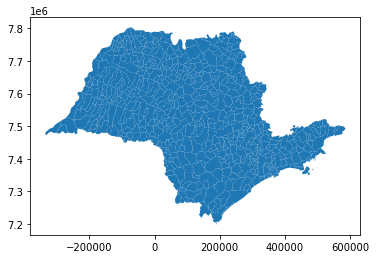

In [9]:
rmsp.plot()

In [10]:
sp = rmsp[rmsp['municipio'].str.lower()\
          .str.contains('são paulo')].copy()

<AxesSubplot:>

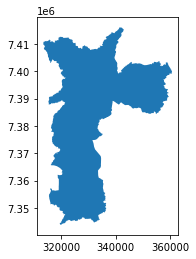

In [11]:
sp.plot()

In [12]:
AREA_SP = sp.area.sum()

In [13]:
area_m2_p_km2(AREA_SP)

1527.54

In [14]:
AREA_SP =  15211100000

In [15]:
AREA_TOTAL_PARQUES = parques.area.sum()

In [16]:
area_m2_p_km2(AREA_TOTAL_PARQUES)

13.86

In [17]:
PERCENT_AREA_PARQUES = AREA_TOTAL_PARQUES/AREA_SP

In [18]:
#INDICADOR APARENTEMENTE CONSIDERA PARQUES ESTADUAIS

In [19]:
PERCENT_AREA_PARQUES

0.0009113602103394771

In [20]:
uc['uc_categor'].unique()

array(['Unidade de Conservação de Proteção Integral',
       'Unidade de Conservação de Uso Sustentável - Área de Proteção Ambiental (APA)',
       'Reserva Particular do Patrimonio Natural'], dtype=object)

In [21]:
protecao_integral = 'Unidade de Conservação de Proteção Integral'

In [22]:
pol_prot_int = uc[uc['uc_categor']==protecao_integral].copy()

<AxesSubplot:>

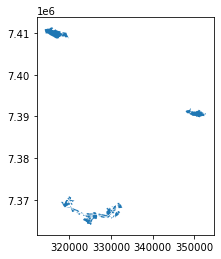

In [23]:
pol_prot_int.plot()

In [24]:
AREA_PROTECAO_INTEGRAL = pol_prot_int.area.sum()

In [25]:
area_m2_p_km2(AREA_PROTECAO_INTEGRAL)

25.59

In [26]:
AREA_PROTECAO_INTEGRAL/AREA_SP

0.00168205758678031

In [27]:
25.59/1527.54

0.016752425468400174

In [28]:
AREA_SP

15211100000

In [29]:
AREA_PROTECAO_INTEGRAL

25585946.158273973